In [3]:
# Data Handling and Manipulation 
import numpy as np  
import pandas as pd  
# Data Visualization 
import matplotlib.pyplot as plt  
import seaborn as sns  
# NLP
from textblob import TextBlob  # For text processing, including sentiment analysis and part-of-speech tagging
# Utility 
from collections import defaultdict  # For creating dictionaries with default values, useful for counting or grouping data

In [ ]:
df=pd.read_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/text_analysis.csv')

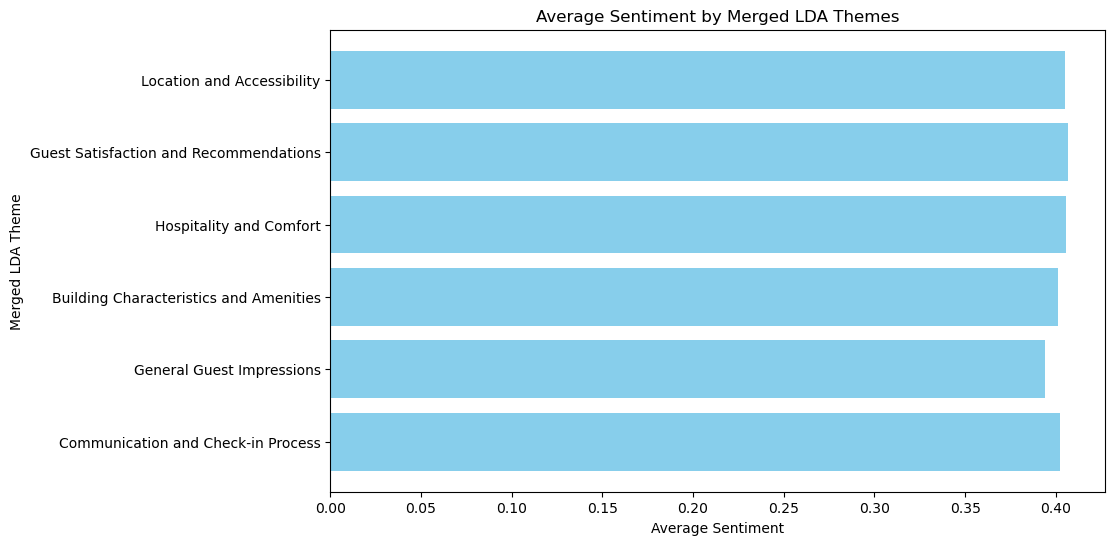

In [4]:
# Updated LDA Themes and Aspects for Sentiment Analysis
lda_themes_aspects = {
    'Location and Accessibility': [
        'easy', 'great', 'place', 'access', 'check', 'good', 'apartment', 'clean', 'location', 'get',
        'walk', 'town', 'distance', 'within', 'old', 'mile', 'station',
        'bus', 'stop', 'tram', 'quick', 'get', 'airport', 'away', 'min'
    ],
    'Guest Satisfaction and Recommendations': [
        'recommend', 'would', 'highly', 'definitely', 'place', 'great', 'apartment', 'location', 'clean', 'lovely',
        'comfortable', 'well', 'parking', 'space', 'quiet',
        'back', 'place', 'everything', 'come', 'definitely', 'would', 'apartment', 'perfect', 'amaze', 'location'
    ],
    'Hospitality and Comfort': [
        'home', 'host', 'make', 'felt', 'like', 'feel', 'welcome', 'you', 'coffee', 'tea',
        'friendly', 'room', 'nice', 'clean', 'house', 'comfortable', 'helpful',
        'host', 'great', 'apartment', 'location', 'helpful', 'responsive', 'excellent', 'clean', 'everything', 'communication'
    ],
    'Building Characteristics and Amenities': [
        'floor', 'top', 'building', 'unit', 'luggage', 'response', 'problem', 'ground', 'old', 'lift',
        'apartment', 'room', 'kitchen', 'good', 'bit', 'night', 'bathroom', 'bed', 'location'
    ],
    'General Guest Impressions': [
        'stayed', 'night', 'best', 'one', 'far', 'place', 'enough', 'weekend', 'ever', 'two'
    ],
    'Communication and Check-in Process': [
        'host', 'you', 'give', 'time', 'even', 'check', 'get', 'go', 'day', 'early'
    ]
}

# Initializing a dictionary to store sentiment scores for each merged LDA theme
merged_theme_sentiments = {}

# Calculating the average sentiment for each merged LDA theme
for theme, aspects in lda_themes_aspects.items():
    # Filtering the DataFrame to include only the rows where any of the aspects belong to the current theme
    relevant_reviews = df[df['aspects'].apply(lambda x: any(aspect in x for aspect in aspects))]
    
    # Calculating the mean sentiment for these relevant reviews
    merged_theme_sentiments[theme] = relevant_reviews['sentiment'].mean()

# Converting to dataframe for easier analysis
merged_theme_sentiments_df = pd.DataFrame(list(merged_theme_sentiments.items()), columns=['Merged Theme', 'Average Sentiment'])

# Visualization: Sentiment Across Merged LDA Themes
plt.figure(figsize=(10, 6))
plt.barh(merged_theme_sentiments_df['Merged Theme'], merged_theme_sentiments_df['Average Sentiment'], color='skyblue')
plt.xlabel('Average Sentiment')
plt.ylabel('Merged LDA Theme')
plt.title('Average Sentiment by Merged LDA Themes')
plt.gca().invert_yaxis()  # Highest sentiment at the top
plt.show()

In [5]:
df_2021 = df[df['Year'] == 2021]
df_2022 = df[df['Year'] == 2022]
df_2023 = df[df['Year'] == 2023]
df_2024 = df[df['Year'] == 2024]

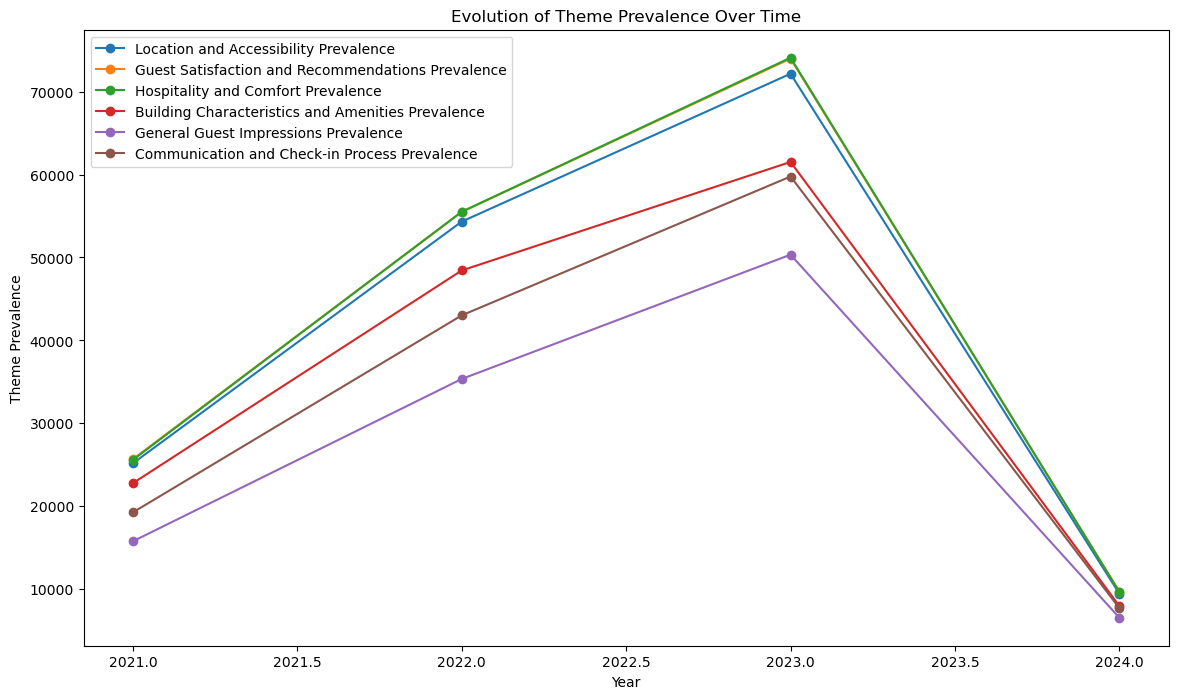

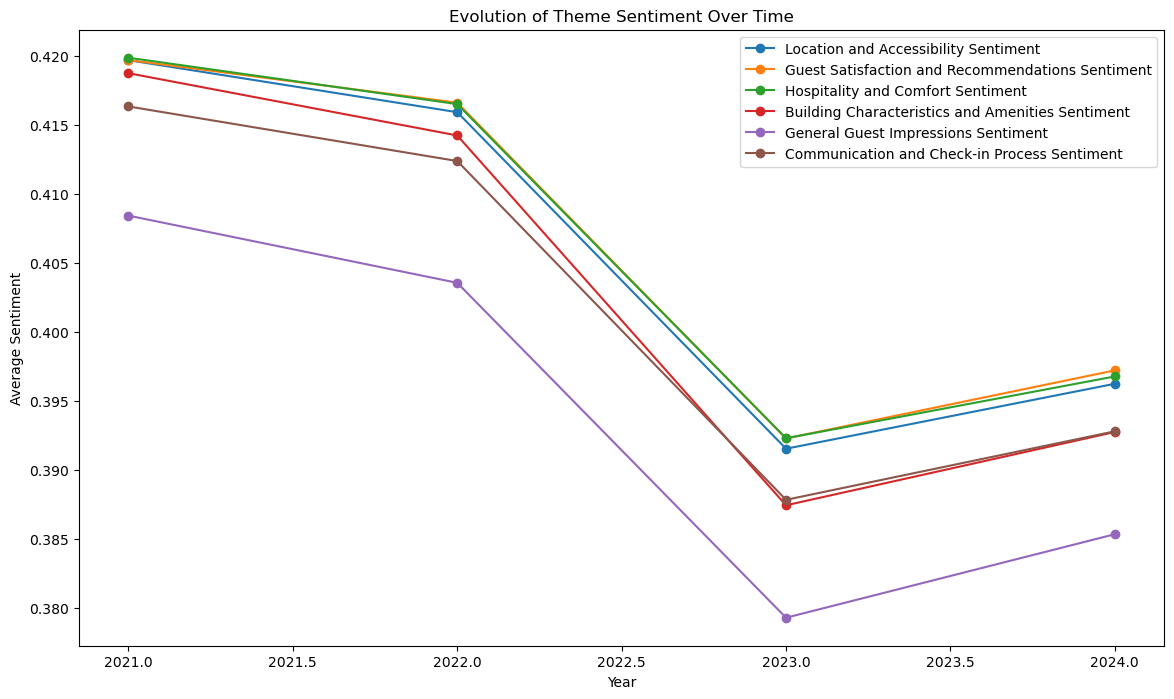

In [7]:
# Temporal Analysis
#  Step 1: Segmenting data by year
years = [2021, 2022, 2023, 2024]

# Step 2: Function to map reviews to predefined themes
def map_to_themes(text, themes_aspects):
    text = text.lower()
    theme_matches = defaultdict(int)
    for theme, keywords in themes_aspects.items():
        if any(keyword in text for keyword in keywords):
            theme_matches[theme] += 1
    return theme_matches

# Step 3: Calculating theme prevalence and sentiment for each year
theme_prevalence = {year: defaultdict(int) for year in years}
theme_sentiment = {year: defaultdict(list) for year in years}

for year in years:
    df_year = df[df['Year'] == year]
    for _, row in df_year.iterrows():
        themes_found = map_to_themes(row['comments'], lda_themes_aspects)
        sentiment = TextBlob(row['comments']).sentiment.polarity
        
        for theme in themes_found:
            theme_prevalence[year][theme] += 1
            theme_sentiment[year][theme].append(sentiment)

# Step 4: Calculating average sentiment and normalize prevalence
theme_avg_sentiment = {year: {} for year in years}
for year in years:
    for theme in lda_themes_aspects.keys():
        if theme_sentiment[year][theme]:
            theme_avg_sentiment[year][theme] = sum(theme_sentiment[year][theme]) / len(theme_sentiment[year][theme])
        else:
            theme_avg_sentiment[year][theme] = 0

# Step 5: Visualizing prevalence and sentiment over time
plt.figure(figsize=(14, 8))

for theme in lda_themes_aspects.keys():
    # Plot prevalence
    prevalence = [theme_prevalence[year][theme] for year in years]
    plt.plot(years, prevalence, marker='o', label=f'{theme} Prevalence')

plt.xlabel('Year')
plt.ylabel('Theme Prevalence')
plt.title('Evolution of Theme Prevalence Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))

for theme in lda_themes_aspects.keys():
    # Plot average sentiment
    avg_sentiment = [theme_avg_sentiment[year][theme] for year in years]
    plt.plot(years, avg_sentiment, marker='o', label=f'{theme} Sentiment')

plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.title('Evolution of Theme Sentiment Over Time')
plt.legend()
plt.show()